In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Read Dataset

In [ ]:
f = open("Concrete_Readme.txt", "r")
print(f.read())
f.close()

Concrete Compressive Strength 

---------------------------------

Data Type: multivariate
 
Abstract: Concrete is the most important material in civil engineering. The 
concrete compressive strength is a highly nonlinear function of age and 
ingredients. These ingredients include cement, blast furnace slag, fly ash, 
water, superplasticizer, coarse aggregate, and fine aggregate.

---------------------------------

Sources: 

  Original Owner and Donor
  Prof. I-Cheng Yeh
  Department of Information Management 
  Chung-Hua University, 
  Hsin Chu, Taiwan 30067, R.O.C.
  e-mail:icyeh@chu.edu.tw
  TEL:886-3-5186511

  Date Donated: August 3, 2007
 
---------------------------------

Data Characteristics:
    
The actual concrete compressive strength (MPa) for a given mixture under a 
specific age (days) was determined from laboratory. Data is in raw form (not scaled). 

Summary Statistics: 

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitat

In [ ]:
df = pd.read_excel('Concrete_Data.xls') 
df = df.rename(columns={df.columns[0]: "Cement", 
                        df.columns[1]: "Blast Furnace Slag",
                        df.columns[2]:"Fly Ash", 
                        df.columns[3]:"Water",
                        df.columns[4]:"Superplasticizer",
                        df.columns[5]:"Coarse Aggregate",
                        df.columns[6]:"Fine Aggregate",
                        df.columns[7]: "Age",
                        df.columns[8]:"Compressive strength"})
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


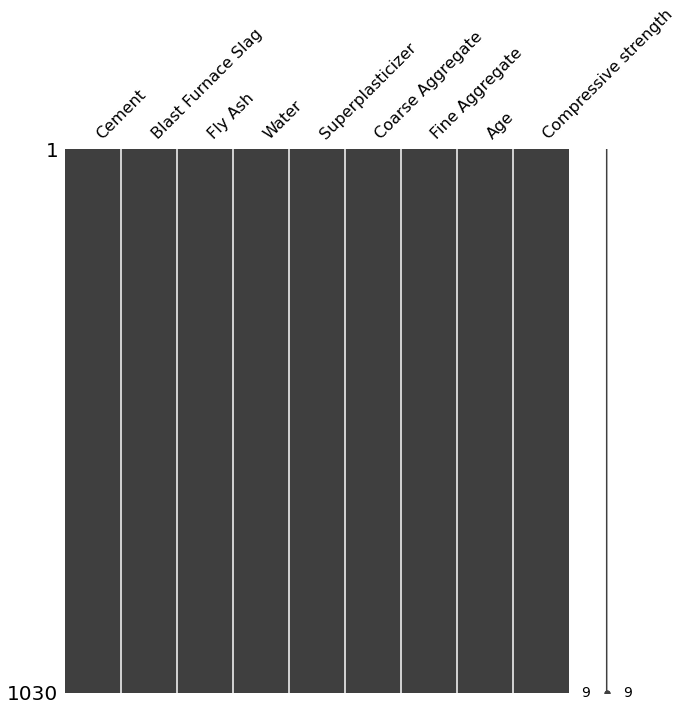

In [ ]:
import missingno as msno
msno.matrix(df, figsize = (10, 10))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast Furnace Slag    1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
# Revisar duplicados
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (25, 9)


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1000,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1001,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1002,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1003,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


## Explore the data

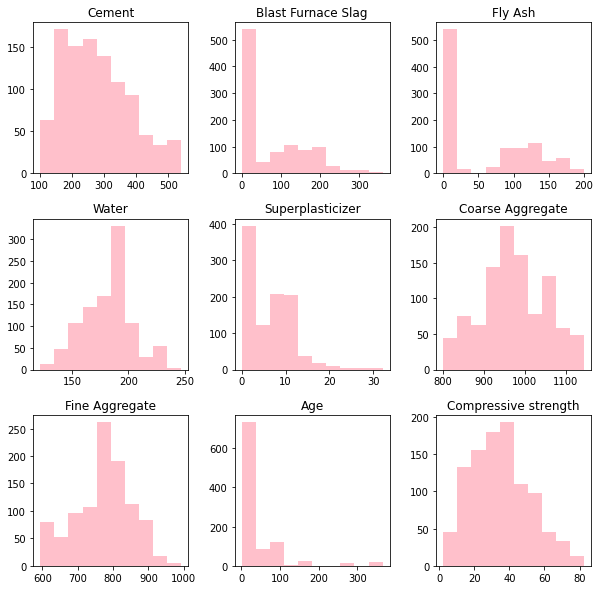

In [ ]:
df.hist(figsize = (10, 10), color = 'pink', grid=False)
plt.show()

In [ ]:
"""# df standarizado
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(df)
df_std = pd.DataFrame(np_scaled, columns = df.columns)
df = df_std"""

'# df standarizado\nfrom sklearn import preprocessing\n\nscaler = preprocessing.StandardScaler()\nnp_scaled = scaler.fit_transform(df)\ndf_std = pd.DataFrame(np_scaled, columns = df.columns)\ndf = df_std'

In [ ]:
# Describe 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1005.0,278.629055,104.345003,102.000000,190.680000,265.000000,349.00000,540.000000
Blast Furnace Slag,1005.0,72.043134,86.170555,0.000000,0.000000,20.000000,142.50000,359.400000
Fly Ash,1005.0,55.535075,64.207448,0.000000,0.000000,0.000000,118.27000,200.100000
Water,1005.0,182.074378,21.340740,121.750000,166.610000,185.700000,192.94000,247.000000
Superplasticizer,1005.0,6.031647,5.919559,0.000000,0.000000,6.100000,10.00000,32.200000
Coarse Aggregate,1005.0,974.376468,77.579534,801.000000,932.000000,968.000000,1031.00000,1145.000000
Fine Aggregate,1005.0,772.686617,80.339851,594.000000,724.300000,780.000000,822.20000,992.600000
Age,1005.0,45.856716,63.734692,1.000000,7.000000,28.000000,56.00000,365.000000
Compressive strength,1005.0,35.250273,16.284808,2.331808,23.523542,33.798114,44.86834,82.599225


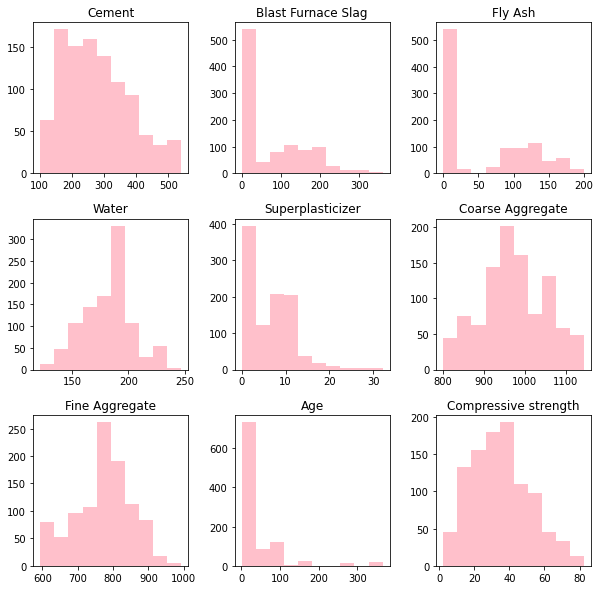

In [ ]:
df.hist(figsize = (10, 10), color = 'pink', grid=False)
plt.show()

In [ ]:
skew_data = df.skew()
skew_data

Cement                  0.564997
Blast Furnace Slag      0.855246
Fly Ash                 0.497324
Water                   0.034119
Superplasticizer        0.981572
Coarse Aggregate       -0.065242
Fine Aggregate         -0.252323
Age                     3.253974
Compressive strength    0.395653
dtype: float64

We can see there a tendency for ASF > 0, Positive Asymmetry. In the case of Fine and Coarse Aggregate  we can see ASF < 0, Negative Assymetry.

In [ ]:
# Correct skew
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(standardize=False)

# drop target
#df1=df.drop("Compressive strength",axis=1)
df1=df
# gaussian like
df2=pt.fit_transform(df1)

df3=pd.DataFrame(df2,columns=['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',"Compressive strength"])

#df3['Compressive strength']=df["Compressive strength"]

df = df3

df.skew() # Now its more gaussian like :D

Cement                 -0.012273
Blast Furnace Slag      0.008635
Fly Ash                 0.172065
Water                   0.005270
Superplasticizer       -0.145648
Coarse Aggregate       -0.020274
Fine Aggregate         -0.012387
Age                     0.000245
Compressive strength   -0.055538
dtype: float64

In [ ]:
kurtosis_data = df.kurtosis()
kurtosis_data

Cement                 -0.851298
Blast Furnace Slag     -1.878412
Fly Ash                -1.954713
Water                   0.166592
Superplasticizer       -1.490273
Coarse Aggregate       -0.591484
Fine Aggregate         -0.093199
Age                    -0.332346
Compressive strength   -0.480407
dtype: float64

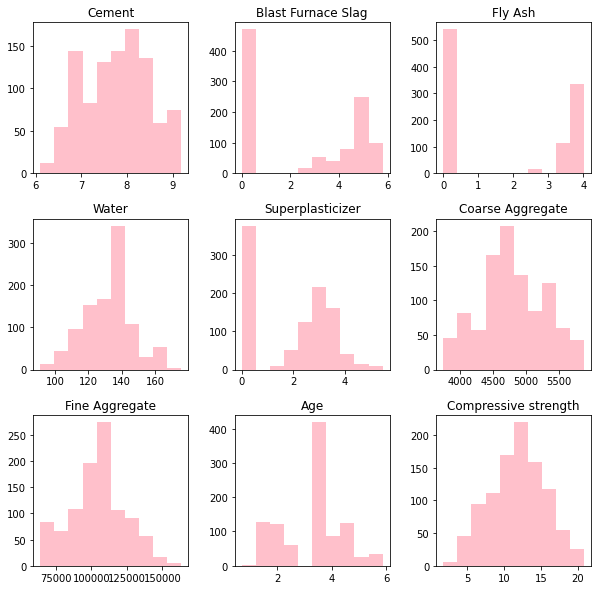

In [ ]:
df.hist(figsize = (10, 10), color = 'pink', grid=False)
plt.show()

In [ ]:
# df standarizado
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(df)
df_std = pd.DataFrame(np_scaled, columns = df.columns)

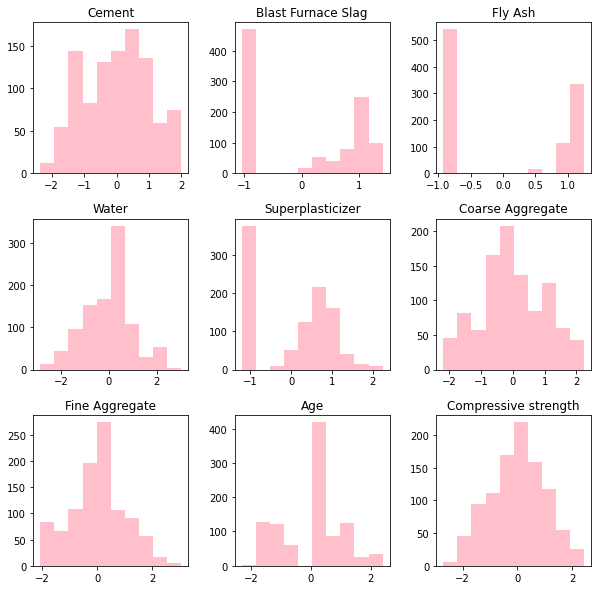

In [ ]:
df_std.hist(figsize = (10, 10), color = 'pink', grid=False)
plt.show()

Tendency: Platikurtic means the distribution produces fewer and less extreme outliers than does the normal distribution.

Just the age has a Leptokurtic behaviour which means that data are heavy-tailed or profusion of outliers.

## Outliers

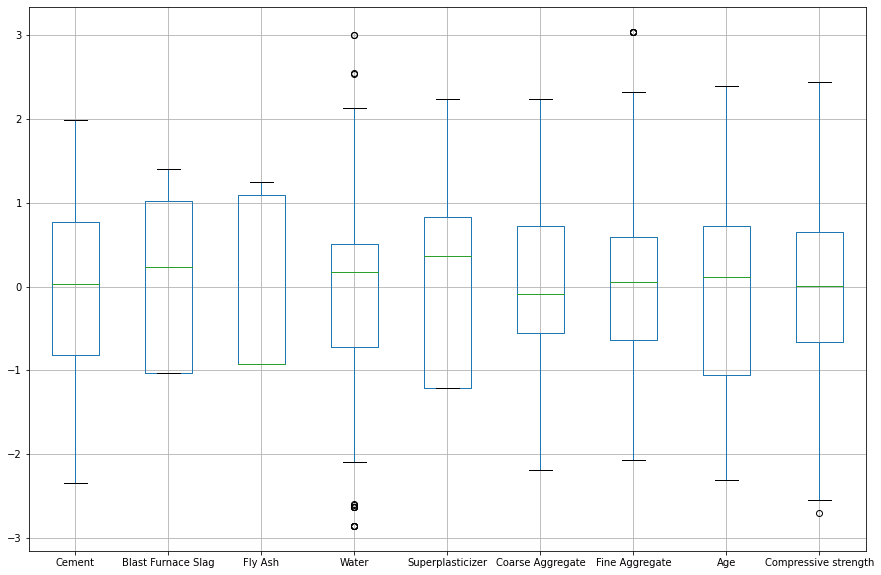

In [ ]:
df_std.boxplot(figsize = (15, 10))

In [ ]:
# remove outliers using Interquartile Range (IQR)
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IQR=Q3-Q1

lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR

In [ ]:
IQR = df[~((df < lowqe_bound) | (df > upper_bound)).any(axis=1)]
IQR.shape

(988, 9)

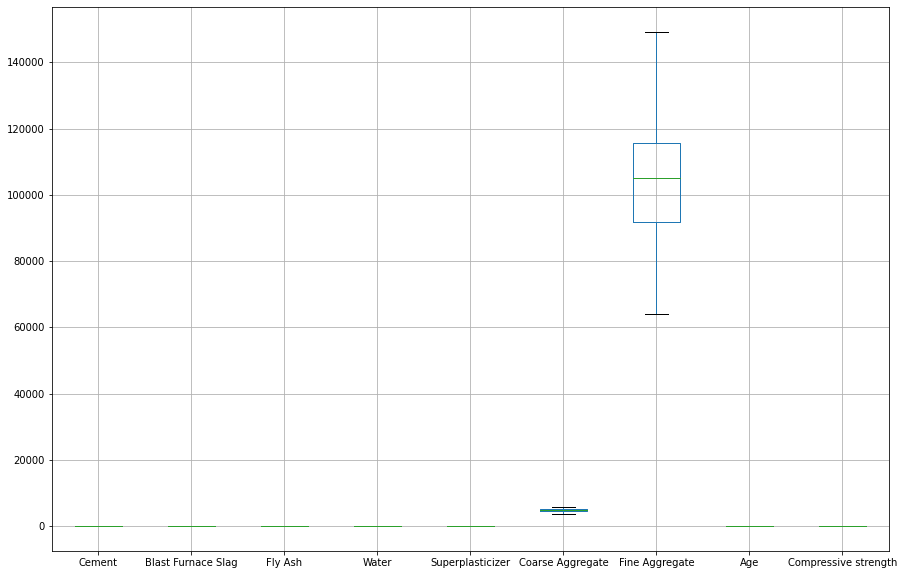

In [ ]:
IQR.boxplot(figsize = (15, 10))

In [ ]:
IQR.reset_index(inplace=True, drop=True)

In [ ]:
df = IQR

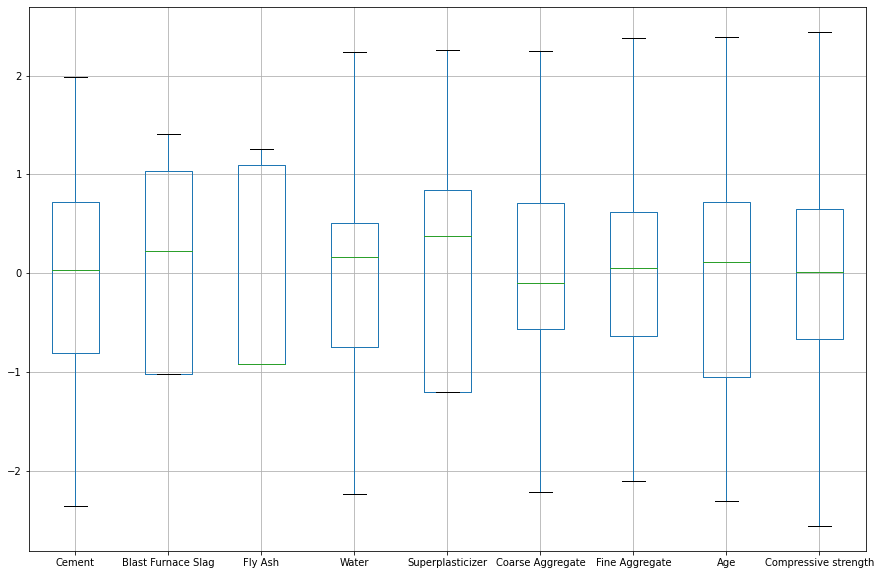

In [ ]:
scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(IQR)
df_std = pd.DataFrame(np_scaled, columns = IQR.columns)
df_std.boxplot(figsize = (15, 10))

## Correlation

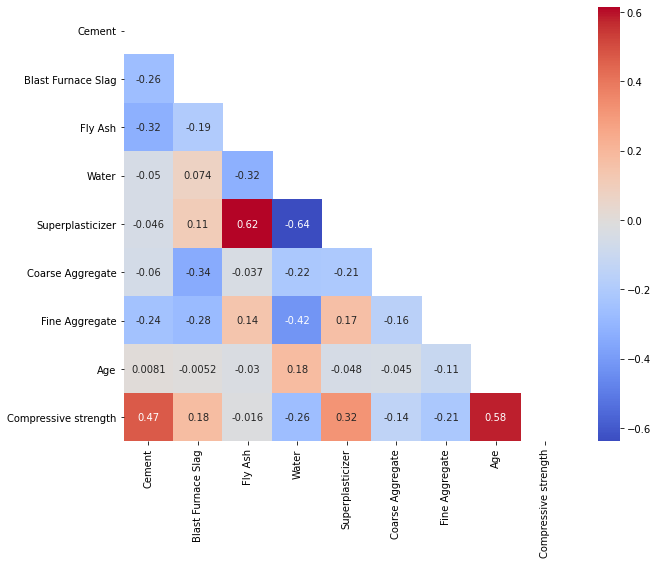

In [ ]:
matrix = np.triu(df.corr())

fig, ax = plt.subplots(figsize=(10,8))

ax = sns.heatmap(df.corr(), annot=True, mask=matrix, cmap= 'coolwarm', ax=ax)

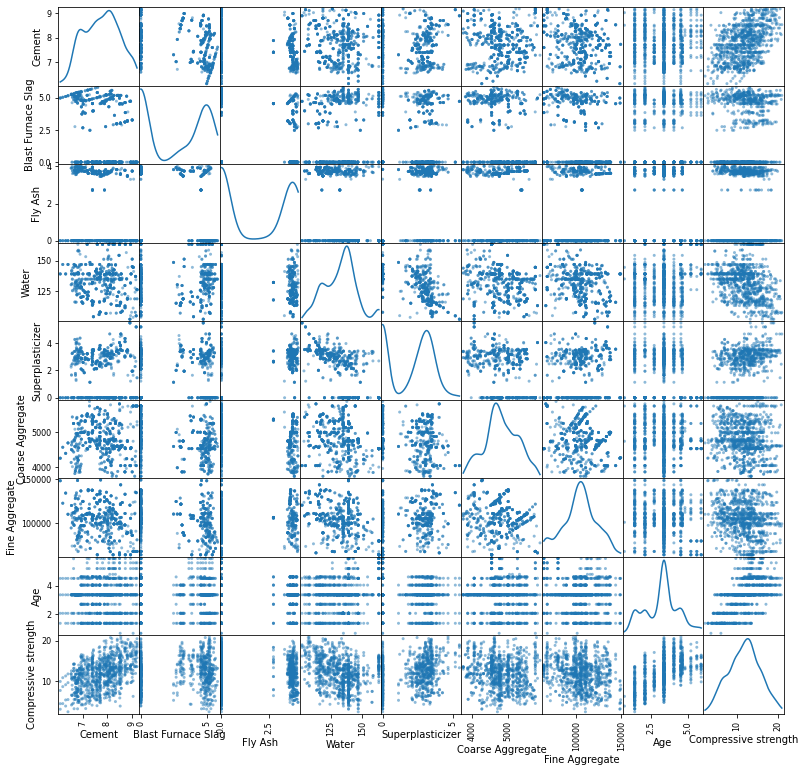

In [ ]:
# scatter Plot
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize = (13, 13), diagonal='kde')
plt.show()

## Modeling

### Multiple Linear Regression

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Age']], df['Compressive strength'], test_size=0.2)

# USE CROSS VALIDATION INSTEAD OF HOLD OUT
X,y=df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Age']], df['Compressive strength']


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([ 2.77896379e+00,  4.79876930e-01,  1.87839505e-01, -1.01303546e-01,
        1.31590586e-01, -4.43304150e-04, -2.28833634e-05,  2.14645737e+00])

In [ ]:
model.intercept_

-0.5347711297951676

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_validate, cross_val_score
coeff=[]
cv_results = cross_validate(model, X, y, cv=5, return_estimator=True, scoring='r2',return_train_score=True)
for model in cv_results['estimator']:
    coeff.append(model.coef_)
for i in range(8):
  print(round((coeff[0][i]+coeff[1][i]+coeff[2][i]+coeff[3][i]+coeff[4][i])/5,4))

2.7126
0.464
0.168
-0.1021
0.1485
-0.0006
-0.0
2.1436


In [ ]:
coeff

[array([ 2.85995877e+00,  4.87384742e-01,  1.54591306e-01, -1.08040101e-01,
         1.62026707e-01, -5.21930613e-04, -2.22844826e-05,  2.23573503e+00]),
 array([ 2.71607914e+00,  4.95662479e-01,  1.04274458e-01, -9.60088442e-02,
         1.19125534e-01, -7.32667064e-04, -2.58555186e-05,  2.07765525e+00]),
 array([ 3.09816098e+00,  5.64307839e-01,  2.85421268e-01, -1.08838607e-01,
        -4.23734575e-02, -3.97417264e-04, -1.82673132e-05,  2.11885525e+00]),
 array([ 2.91448936e+00,  4.90596550e-01,  1.90648048e-01, -8.83793352e-02,
         1.93705474e-01, -1.93300496e-04, -1.35556677e-05,  2.14687905e+00]),
 array([ 1.97435157e+00,  2.82256053e-01,  1.05168980e-01, -1.09451296e-01,
         3.09931884e-01, -1.01382845e-03, -4.77627473e-05,  2.13903048e+00])]

In [ ]:
cv_results

{'estimator': (LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)),
 'fit_time': array([0.00516772, 0.00425005, 0.00227976, 0.002074  , 0.0031662 ]),
 'score_time': array([0.00155139, 0.0014205 , 0.00132847, 0.00128031, 0.00165248]),
 'test_score': array([0.76792595, 0.75647393, 0.7510643 , 0.86759335, 0.45506261]),
 'train_score': array([0.82263414, 0.82775396, 0.83509572, 0.79970238, 0.85485376])}

In [ ]:
from statistics import mean
round(mean([0.81103425, 0.8142497 , 0.82692448, 0.79075414, 0.84076338]),4)

0.8167

In [ ]:

round(mean([0.81103425, 0.8142497 , 0.82692448, 0.79075414, 0.84076338]),4)

0.8167

In [ ]:
cross_val_score(model, X, y, cv=5, scoring='r2',).mean().round(4)

0.7196

In [ ]:
cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error').mean().round(4)

-1.7669

In [ ]:
cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean().round(4)

-1.4016

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


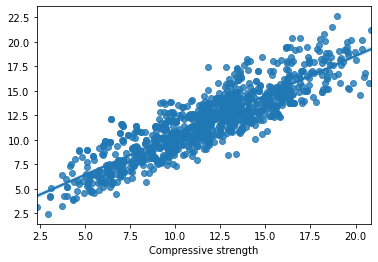

In [ ]:
predictions = cross_val_predict(model, X, y, cv=5)

sns.regplot(y,predictions)

In [ ]:
# TEST EVALUATION
from sklearn import metrics 

print('Mean squared error: %.2f'% metrics.mean_squared_error(y,predictions, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% metrics.r2_score(y,predictions))

Mean squared error: 1.79
Coefficient of determination: 0.77


In [ ]:
model.score(X,y) # Without validation

0.8051472736505475

### Lasso Regression with CV

In [ ]:
from sklearn.linear_model import LassoCV, Lasso

alphas = [0.000001,0.00001,0.0001,0.01,0.1,1,0.5,3,5,10,15,100,1000,10000]
#alphas=10**np.linspace(6,-2,50)*0.5
# init object
model = LassoCV(alphas=alphas, cv=5)

# fit values
model.fit(X,y)



LassoCV(alphas=[1e-06, 1e-05, 0.0001, 0.01, 0.1, 1, 0.5, 3, 5, 10, 15, 100,
                1000, 10000],
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [ ]:
model.intercept_

-0.5346011201423515

In [ ]:
model.coef_

array([ 2.77895649e+00,  4.79875030e-01,  1.87837727e-01, -1.01303845e-01,
        1.31589889e-01, -4.43312138e-04, -2.28835890e-05,  2.14645652e+00])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


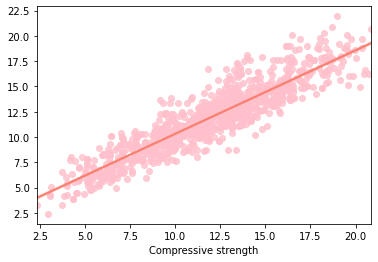

In [ ]:
predictions = model.predict(X)

sns.regplot(y,predictions, scatter_kws={"color": "pink"}, line_kws={"color": "salmon"})

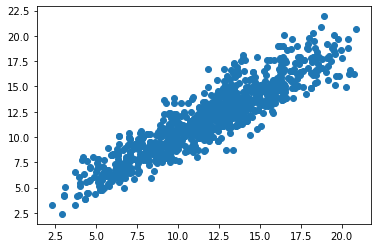

In [ ]:
plt.scatter(y, predictions)

In [ ]:
# TEST EVALUATION
from sklearn import metrics 

print('Mean squared error: %.2f'% metrics.mean_squared_error(y, predictions, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% metrics.r2_score(y, predictions))

Mean squared error: 1.55
Coefficient of determination: 0.83


In [ ]:
model.score(X,y)

0.8254926557333452

In [ ]:
model.alpha_ # this means that a linear reg is performed for the best results

1e-06

In [ ]:
model.coef_ # for best alpha

array([ 2.77895649e+00,  4.79875030e-01,  1.87837727e-01, -1.01303845e-01,
        1.31589889e-01, -4.43312138e-04, -2.28835890e-05,  2.14645652e+00])

In [ ]:
model = Lasso(alpha=0.000001)
model.fit(X,y)
model.coef_
#model.score(X,y)

array([ 2.77895649e+00,  4.79875030e-01,  1.87837727e-01, -1.01303845e-01,
        1.31589889e-01, -4.43312138e-04, -2.28835890e-05,  2.14645652e+00])

In [ ]:
coeff=[]
cv_results = cross_validate(model, X, y, cv=5, return_estimator=True, scoring='r2',return_train_score=True)
cv_results

for model in cv_results['estimator']:
    coeff.append(model.coef_)
for i in range(8):
  print(round((coeff[0][i]+coeff[1][i]+coeff[2][i]+coeff[3][i]+coeff[4][i])/5,4))

2.7126
0.464
0.168
-0.1021
0.1485
-0.0006
-0.0
2.1436


In [ ]:
suma=0
for model in cv_results['estimator']:
  suma+=model.intercept_
  print(model.intercept_)
round(suma/5, 4)

-0.2661845794738813
1.0662508434647808
-2.5037878380457403
-5.617207161001465
12.63012266494805


1.0618

In [ ]:
cv_results

{'estimator': (Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False),
  Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False),
  Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False),
  Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selection='cyclic', tol=0.0001, warm_start=False),
  Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=1000,
        normalize=False, positive=False, precompute=False, random_state=None,
        selectio

In [ ]:
round(mean([0.81103425, 0.8142497 , 0.82692448, 0.79075414, 0.84076338]),4)

0.8167

In [ ]:
print(cross_val_score(model, X, y, cv=5, scoring='r2').mean().round(4))
print(cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error').mean().round(4))
print(cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean().round(4))

0.7196
-1.7669
-1.4016


In [ ]:
metrics.mean_squared_error(y, model.predict(X), squared=False)

1.6385288893976535

In [ ]:
y.std()

3.713816503129559

In [ ]:
metrics.r2_score(y,model.predict(X))

0.8051469920912867

Text(0, 0.5, 'weights')

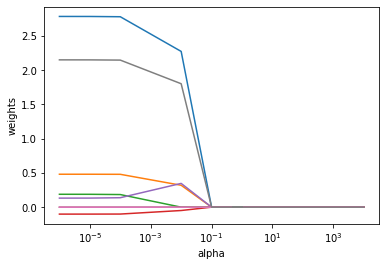

In [ ]:
lasso = Lasso(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

### Ridge Regression with CV

In [ ]:
from sklearn.linear_model import RidgeCV,Ridge

# init object
model = RidgeCV( alphas=alphas,cv=5)

# fit values
model.fit(X,y)

RidgeCV(alphas=array([1.0e-06, 1.0e-05, 1.0e-04, 1.0e-02, 1.0e-01, 1.0e+00, 5.0e-01,
       3.0e+00, 5.0e+00, 1.0e+01, 1.5e+01, 1.0e+02, 1.0e+03, 1.0e+04]),
        cv=5, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [ ]:
model.intercept_

-0.534770821493245

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


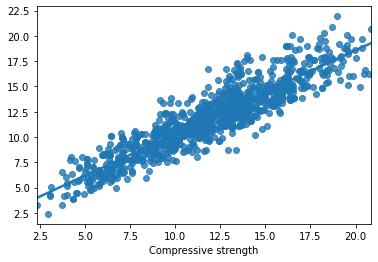

In [ ]:
test_predictions = model.predict(X)

sns.regplot(y,test_predictions)

In [ ]:
# TEST EVALUATION

print('Mean squared error: %.2f'% metrics.mean_squared_error(y, test_predictions, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% metrics.r2_score(y, test_predictions))

Mean squared error: 1.55
Coefficient of determination: 0.83


In [ ]:
model.score(X,y)

0.8254926557342309

In [ ]:
model.alpha_

1e-06

In [ ]:
model.coef_

array([ 2.77896377e+00,  4.79876926e-01,  1.87839501e-01, -1.01303546e-01,
        1.31590586e-01, -4.43304164e-04, -2.28833639e-05,  2.14645737e+00])

In [ ]:
model=Ridge(alpha=1e-6)
model.fit(X,y)
print(cross_val_score(model, X, y, cv=5, scoring='r2').mean())
print(cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error').mean())
print(cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean())

0.7196240255337516
-1.766920020204908
-1.4015515133330836


In [ ]:
coeff=[]
cv_results = cross_validate(model, X, y, cv=5, return_estimator=True, scoring='r2',return_train_score=True)
for model in cv_results['estimator']:
    coeff.append(model.coef_)
for i in range(8):
  print(round((coeff[0][i]+coeff[1][i]+coeff[2][i]+coeff[3][i]+coeff[4][i])/5,4))

2.7126
0.464
0.168
-0.1021
0.1485
-0.0006
-0.0
2.1436


In [ ]:
model.intercept_

12.629914333386573

Text(0, 0.5, 'weights')

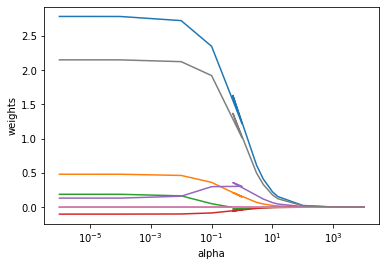

In [ ]:
lasso = Ridge(max_iter=10000, normalize=True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

### ElasticNet with CV

In [ ]:
from sklearn.linear_model import ElasticNetCV, ElasticNet

l1=[.1, .5, .7, .9, .95, .99, 1]

# init object
model = ElasticNetCV(alphas=alphas, l1_ratio=l1, cv=5)

# fit values
model.fit(X,y)

ElasticNetCV(alphas=[1e-06, 1e-05, 0.0001, 0.01, 0.1, 1, 0.5, 3, 5, 10, 15, 100,
                     1000, 10000],
             copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000,
             n_alphas=100, n_jobs=None, normalize=False, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [ ]:
model.intercept_

-0.5346011201423515

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


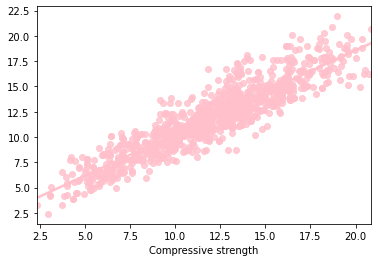

In [ ]:
test_predictions = model.predict(X)

sns.regplot(y,test_predictions, color='pink')

In [ ]:
# TEST EVALUATION

print('Mean squared error: %.2f'% metrics.mean_squared_error(y,test_predictions, squared=False))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% metrics.r2_score(y, test_predictions))

Mean squared error: 1.55
Coefficient of determination: 0.83


In [ ]:
model.score(X,y)

0.8254926557333452

In [ ]:
model.alpha_

1e-06

In [ ]:
model.coef_

array([ 2.77895649e+00,  4.79875030e-01,  1.87837727e-01, -1.01303845e-01,
        1.31589889e-01, -4.43312138e-04, -2.28835890e-05,  2.14645652e+00])

In [ ]:
model.l1_ratio_ # L1 penalty -- Lasso

1.0

In [ ]:
model=ElasticNet(alpha=1e-6, l1_ratio=1)
model.fit(X,y)
print(cross_val_score(model, X, y, cv=5, scoring='r2').mean())
print(cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error').mean())
print(cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean())

0.7196237357189321
-1.76692029615405
-1.4015519858303949


In [ ]:
coeff=[]
cv_results = cross_validate(model, X, y, cv=5, return_estimator=True, scoring='r2',return_train_score=True)
for model in cv_results['estimator']:
    coeff.append(model.coef_)
for i in range(8):
  print(round((coeff[0][i]+coeff[1][i]+coeff[2][i]+coeff[3][i]+coeff[4][i])/5,4))

2.7126
0.464
0.168
-0.1021
0.1485
-0.0006
-0.0
2.1436


In [ ]:
model.intercept_

12.63012266494805